# NOTE TO SELF


1.   Clean the data
2.   Find what is interesting about the data
3.   Create awesome visualizations to help articulate the data.
4.   Create a stellar website and awesome presentation
5.   Most importantly YOU GOT THIS!!!! 



# Research Questions
*   Which toxin type has the most exposure?
*   What is the most common contracting method?






In [0]:
import pandas as pd
cdc_bot=pd.read_csv('https://data.cdc.gov/api/views/66i6-hisz/rows.csv?accessType=DOWNLOAD')
cdc_bot.head()
# Bot Type stands for botulism transmission type
#Toxin Types A and B are capable of causing disease in humans
# and are also used commercially and medically

,State,Year,BotType,ToxinType,Count
0,Alaska,1947,Foodborne,Unknown,3
1,Alaska,1948,Foodborne,Unknown,4
2,Alaska,1950,Foodborne,E,5
3,Alaska,1952,Foodborne,E,1
4,Alaska,1956,Foodborne,E,5


In [0]:
cdc_bot.shape

(2280, 5)

In [0]:
cdc_bot.isnull().sum()

State        34
Year          0
BotType       0
ToxinType     0
Count         0
dtype: int64

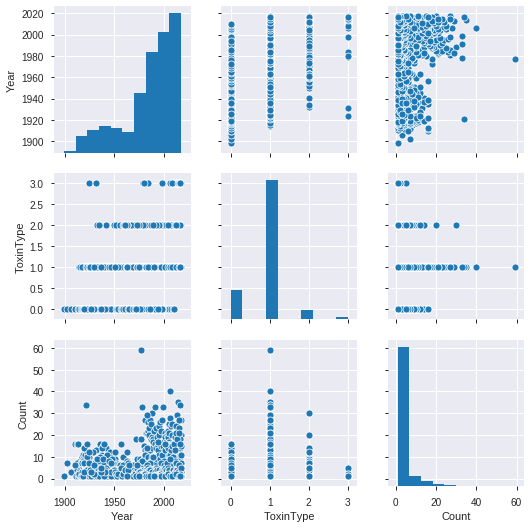

In [76]:
import seaborn as sns
sns.pairplot(cdc_bot)
plt.show()

In [0]:
import os, sys
in_colab = 'google.colab' in sys.modules

if in_colab:
    # Install required python packages:
    # category_encoders, version >= 2.0
    # pandas-profiling, version >= 2.0
    # plotly, version >= 4.0
    !pip install --upgrade category_encoders pandas-profiling plotly
    
    # Pull files from Github repo
    os.chdir('/content')
    !git init .
    !git remote add origin https://github.com/LambdaSchool/DS-Unit-2-Regression-Classification.git
    !git pull origin master
    
    # Change into directory for module
    os.chdir('module4')


In [0]:
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
import pandas_profiling 
cdc_bot.profile_report()

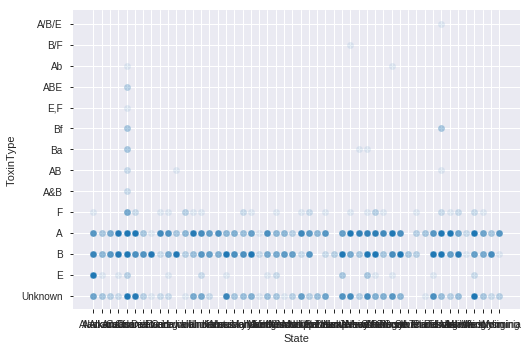

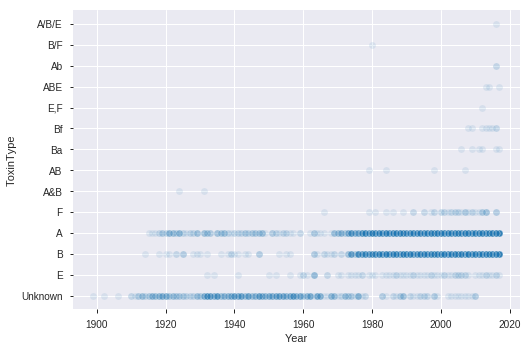

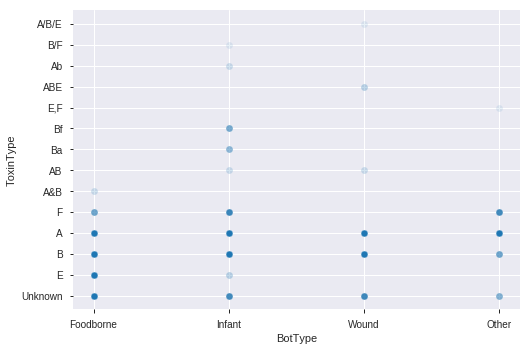

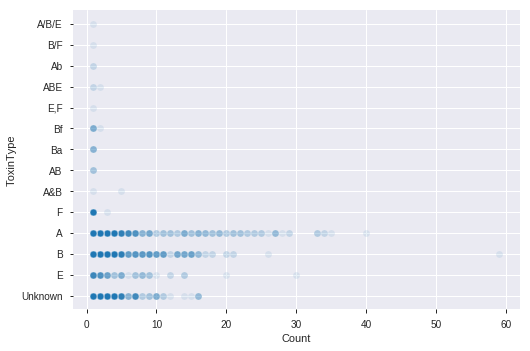

In [0]:
import matplotlib.pyplot as plt
target = 'ToxinType'
features = cdc_bot.columns.drop(['ToxinType'])
for feature in features:
    sns.scatterplot(x=feature, y=target, data=cdc_bot, alpha=0.1)
    plt.show()

In [0]:
! pip install plotly==4.1.0

In [0]:
# I have categorized the Toxin types into numerical values based on Toxin groups
# A-B share the same toxin group and E-F share the same toxin group 
# Toxins AB and Bf are sub groups and share the same numerical value
# All sub groups share the same numerical value because they are multiple toxins
import numpy as np
np.NaN
cdc_bot=cdc_bot.replace({'A':1, 'B':1, 'E':2, 'F':2, 'AB':3,'Ab':3, 'A&B':3, 
                         'Ba':3,'Bf':3, 'B/F':3, 'E,F':3,'ABE':3,'A/B/E':3, 
                         'Unknown':np.NaN})
cdc_bot.head()

,State,Year,BotType,ToxinType,Count
0,Alaska,1947,Foodborne,NaN,3
1,Alaska,1948,Foodborne,NaN,4
2,Alaska,1950,Foodborne,2.0,5
3,Alaska,1952,Foodborne,2.0,1
4,Alaska,1956,Foodborne,2.0,5


In [0]:
cdc_bot=cdc_bot.fillna(0)
cdc_bot.head()

,State,Year,BotType,ToxinType,Count
0,Alaska,1947,Foodborne,0.0,3
1,Alaska,1948,Foodborne,0.0,4
2,Alaska,1950,Foodborne,2.0,5
3,Alaska,1952,Foodborne,2.0,1
4,Alaska,1956,Foodborne,2.0,5


In [0]:
toxin_type= cdc_bot['ToxinType']
print(toxin_type.shape)
toxin_type.head()

(2280,)


0    0.0
1    0.0
2    2.0
3    2.0
4    2.0
Name: ToxinType, dtype: float64

In [0]:
np.mean(cdc_bot)
#This test shows that 1985 had the most cases of the botulinum toxin

Year         1985.741667
ToxinType       0.912719
Count           3.199123
dtype: float64

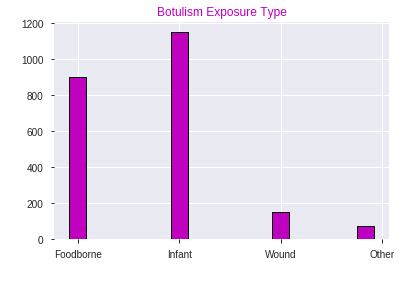

In [74]:
# This histogram is graphing the Bot Type and Count to give us a better 
# insight on the methods of exposure. Which is the most common.
plt.hist(cdc_bot['BotType'], bins=18, align='left', color='m', edgecolor='k',
              linewidth=1)
 
plt.xlabel("Exposure Type",color='white')
plt.ylabel("Count",color='white')
plt.title("Botulism Exposure Type",color='m')
 
plt.show()

In [77]:
import plotly.express as px

tox_data = px.histogram(cdc_bot, x="Year", y="Count", color="ToxinType", 
                        marginal="rug", hover_data=cdc_bot.columns)
tox_data.show()
# Toxin Type 1.0 is the most common contracted toxin type

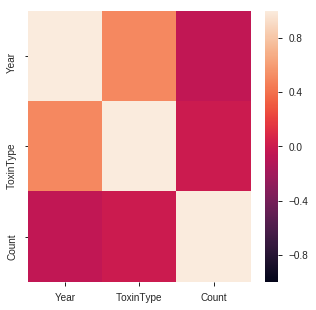

In [0]:
# This proved that there is no correlation between the given data
plt.figure(figsize=(5,5))
sns.heatmap(cdc_bot.corr(),vmin=-1);